In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

plt.rcParams['font.family'] = 'pretendard'
plt.rcParams['axes.unicode_minus'] = False  # 음수 부호 깨짐 방지

In [12]:
import pandas as pd

# 파일 불러오기
승인매출정보 = pd.read_parquet("merged_승인매출정보.parquet")
회원정보 = pd.read_parquet("merged_회원정보.parquet")

# 필요한 컬럼만 선택해서 병합 준비
# (예: ID 기준으로 병합 시에는 사전 전처리나 중복확인 필요할 수 있음)
merged_승인매출정보 = 승인매출정보.copy()
merged_회원정보 = 회원정보.copy()

In [13]:
# 할부건수_ / 할부금액_ 으로 시작하는 컬럼 필터링
installment_cols = [col for col in merged_승인매출정보.columns if '할부건수_' in col or '할부금액_' in col]

# ID 포함해서 필요한 컬럼만 추출
installment_df = merged_승인매출정보[['ID'] + installment_cols]

In [14]:
segment_df = merged_회원정보[['ID', 'Segment']]

In [15]:
# 1. 할부 관련 컬럼 + ID 추출
installment_cols = [col for col in merged_승인매출정보.columns if '할부건수_' in col or '할부금액_' in col]
installment_df = merged_승인매출정보[['ID'] + installment_cols]

# 2. ID 기준 평균 집계
installment_grouped = installment_df.groupby('ID').mean().reset_index()

# 3. Segment 정보에서 ID, Segment 추출 + 중복 제거
segment_df = merged_회원정보[['ID', 'Segment']].drop_duplicates()

# 4. 병합
installment_merged = pd.merge(installment_grouped, segment_df, on='ID', how='left')

In [16]:
installment_merged

,ID,할부건수_3M_R12M,할부건수_6M_R12M,할부건수_12M_R12M,할부건수_14M_R12M,할부금액_3M_R12M,할부금액_6M_R12M,할부금액_12M_R12M,할부금액_14M_R12M,할부건수_유이자_3M_R12M,...,할부금액_무이자_14M_R12M,할부건수_부분_3M_R12M,할부건수_부분_6M_R12M,할부건수_부분_12M_R12M,할부건수_부분_14M_R12M,할부금액_부분_3M_R12M,할부금액_부분_6M_R12M,할부금액_부분_12M_R12M,할부금액_부분_14M_R12M,Segment
0,TRAIN_000000,0.000000,3.000000,0.0,0.0,3784.333333,4445.333333,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,D
1,TRAIN_000001,0.000000,0.000000,0.0,0.0,2017.500000,0.000000,0.0,676.333333,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,E
2,TRAIN_000002,0.000000,3.833333,0.0,0.0,0.000000,10651.166667,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,C
3,TRAIN_000003,11.833333,0.000000,0.0,0.0,25038.833333,0.000000,0.0,0.000000,5.500000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,D
4,TRAIN_000004,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,E
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399995,TRAIN_399995,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,E
399996,TRAIN_399996,0.000000,0.000000,0.0,0.0,1980.666667,0.000000,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,D
399997,TRAIN_399997,5.833333,0.000000,0.0,0.0,32734.666667,0.000000,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,C
399998,TRAIN_399998,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,E


In [17]:
# 각 컬럼별 결측치 개수 확인
installment_merged.isnull().sum()

ID                   0
할부건수_3M_R12M         0
할부건수_6M_R12M         0
할부건수_12M_R12M        0
할부건수_14M_R12M        0
할부금액_3M_R12M         0
할부금액_6M_R12M         0
할부금액_12M_R12M        0
할부금액_14M_R12M        0
할부건수_유이자_3M_R12M     0
할부건수_유이자_6M_R12M     0
할부건수_유이자_12M_R12M    0
할부건수_유이자_14M_R12M    0
할부금액_유이자_3M_R12M     0
할부금액_유이자_6M_R12M     0
할부금액_유이자_12M_R12M    0
할부금액_유이자_14M_R12M    0
할부건수_무이자_3M_R12M     0
할부건수_무이자_6M_R12M     0
할부건수_무이자_12M_R12M    0
할부건수_무이자_14M_R12M    0
할부금액_무이자_3M_R12M     0
할부금액_무이자_6M_R12M     0
할부금액_무이자_12M_R12M    0
할부금액_무이자_14M_R12M    0
할부건수_부분_3M_R12M      0
할부건수_부분_6M_R12M      0
할부건수_부분_12M_R12M     0
할부건수_부분_14M_R12M     0
할부금액_부분_3M_R12M      0
할부금액_부분_6M_R12M      0
할부금액_부분_12M_R12M     0
할부금액_부분_14M_R12M     0
Segment              0
dtype: int64

In [19]:
# 1. 컬럼 분리
cols_건수 = [col for col in installment_merged.columns if '할부건수_' in col]
cols_금액 = [col for col in installment_merged.columns if '할부금액_' in col]

# 2. Segment별 0이 아닌 비율 계산 함수
def calc_nonzero_ratio(df, cols):
    return df.groupby('Segment')[cols].apply(lambda g: (g != 0).sum() / len(g))

# 3. 각각 비율 계산
비율_건수 = calc_nonzero_ratio(installment_merged, cols_건수)
비율_금액 = calc_nonzero_ratio(installment_merged, cols_금액)

# 4. 보기 좋게 % 형식 지정
pd.options.display.float_format = '{:.2%}'.format

# 5. 결과 출력
print("✅ [Segment별] 할부건수 0이 아닌 비율")
display(비율_건수)

print("✅ [Segment별] 할부금액 0이 아닌 비율")
display(비율_금액)

✅ [Segment별] 할부건수 0이 아닌 비율


,할부건수_3M_R12M,할부건수_6M_R12M,할부건수_12M_R12M,할부건수_14M_R12M,할부건수_유이자_3M_R12M,할부건수_유이자_6M_R12M,할부건수_유이자_12M_R12M,할부건수_유이자_14M_R12M,할부건수_무이자_3M_R12M,할부건수_무이자_6M_R12M,할부건수_무이자_12M_R12M,할부건수_무이자_14M_R12M,할부건수_부분_3M_R12M,할부건수_부분_6M_R12M,할부건수_부분_12M_R12M,할부건수_부분_14M_R12M
Segment,,,,,,,,,,,,,,,,
A,75.31%,48.15%,8.64%,0.00%,3.70%,12.96%,1.23%,0.00%,75.31%,45.06%,8.02%,0.00%,0.00%,0.00%,0.00%,0.00%
B,100.00%,58.33%,4.17%,0.00%,8.33%,12.50%,0.00%,0.00%,100.00%,58.33%,4.17%,0.00%,0.00%,0.00%,0.00%,0.00%
C,53.65%,37.42%,5.39%,0.06%,20.45%,10.51%,2.00%,0.06%,51.29%,34.08%,3.47%,0.00%,0.00%,0.00%,0.14%,0.00%
D,50.12%,34.34%,4.13%,0.03%,24.11%,9.09%,1.68%,0.03%,46.56%,31.48%,2.51%,0.00%,0.00%,0.00%,0.11%,0.00%
E,22.94%,13.13%,1.25%,0.01%,9.20%,2.73%,0.50%,0.01%,20.65%,11.97%,0.77%,0.00%,0.00%,0.00%,0.03%,0.00%


✅ [Segment별] 할부금액 0이 아닌 비율


,할부금액_3M_R12M,할부금액_6M_R12M,할부금액_12M_R12M,할부금액_14M_R12M,할부금액_유이자_3M_R12M,할부금액_유이자_6M_R12M,할부금액_유이자_12M_R12M,할부금액_유이자_14M_R12M,할부금액_무이자_3M_R12M,할부금액_무이자_6M_R12M,할부금액_무이자_12M_R12M,할부금액_무이자_14M_R12M,할부금액_부분_3M_R12M,할부금액_부분_6M_R12M,할부금액_부분_12M_R12M,할부금액_부분_14M_R12M
Segment,,,,,,,,,,,,,,,,
A,77.78%,57.41%,24.07%,8.02%,4.32%,18.52%,4.94%,4.94%,77.78%,54.94%,17.90%,3.09%,0.00%,0.00%,4.94%,0.00%
B,100.00%,75.00%,29.17%,8.33%,8.33%,25.00%,0.00%,8.33%,100.00%,70.83%,25.00%,0.00%,0.00%,0.00%,4.17%,0.00%
C,62.80%,49.29%,17.72%,4.04%,25.98%,17.17%,5.69%,3.73%,60.54%,44.63%,10.75%,0.30%,0.00%,0.00%,4.44%,0.01%
D,61.33%,47.60%,15.42%,3.88%,31.26%,15.43%,5.07%,3.44%,57.55%,43.42%,8.99%,0.45%,0.00%,0.00%,4.13%,0.01%
E,32.48%,21.93%,6.27%,4.93%,13.28%,5.34%,1.97%,3.94%,29.79%,19.92%,3.53%,0.99%,0.00%,0.00%,1.64%,0.01%


In [20]:
segment_b_df = installment_merged[installment_merged['Segment'] == 'B']

In [21]:
# 할부금액 관련 컬럼 중 _R12M 이 붙은 세부 기간별 항목
cols_세부금액 = [col for col in segment_b_df.columns if '할부금액_' in col and '_R12M' in col]

# 할부건수 관련 컬럼 (최근 6개월 평균치 기반)
cols_건수 = [col for col in segment_b_df.columns if '할부건수_' in col]

# 할부금액 월별 (B0M ~ B5M 등) 컬럼
cols_월별금액 = [col for col in segment_b_df.columns if '할부금액_' in col and '_R12M' not in col]

In [22]:
# 평균 계산
b_세부금액_mean = segment_b_df[cols_세부금액].mean().sort_values(ascending=False)
b_월별금액_mean = segment_b_df[cols_월별금액].mean().sort_values(ascending=False)
b_건수_mean = segment_b_df[cols_건수].mean().sort_values(ascending=False)


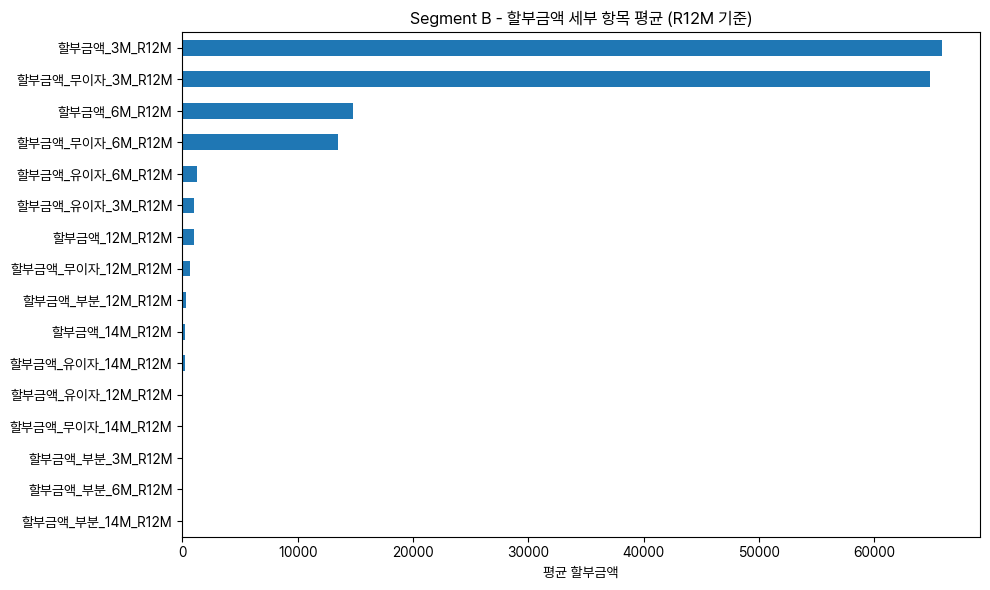

In [25]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
b_세부금액_mean.plot(kind='barh')
plt.gca().invert_yaxis()
plt.title("Segment B - 할부금액 세부 항목 평균 (R12M 기준)")
plt.xlabel("평균 할부금액")
plt.tight_layout()
plt.show()

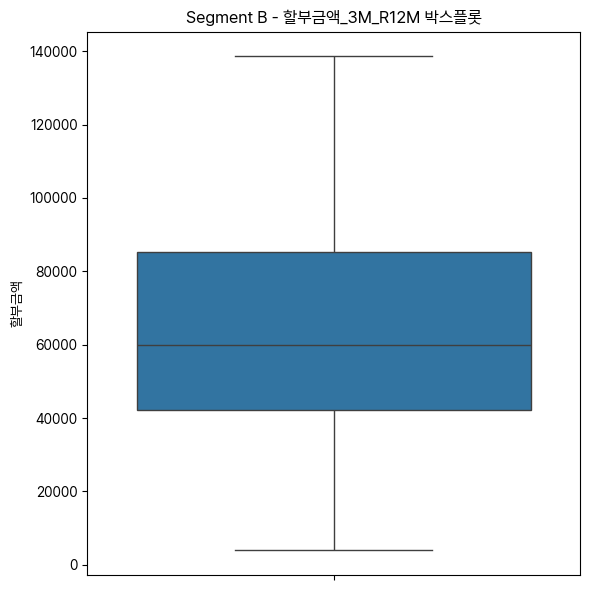

In [33]:
plt.figure(figsize=(6, 6))
sns.boxplot(y=segment_b_df['할부금액_3M_R12M'])
plt.title("Segment B - 할부금액_3M_R12M 박스플롯")
plt.ylabel("할부금액")
plt.tight_layout()
plt.show()

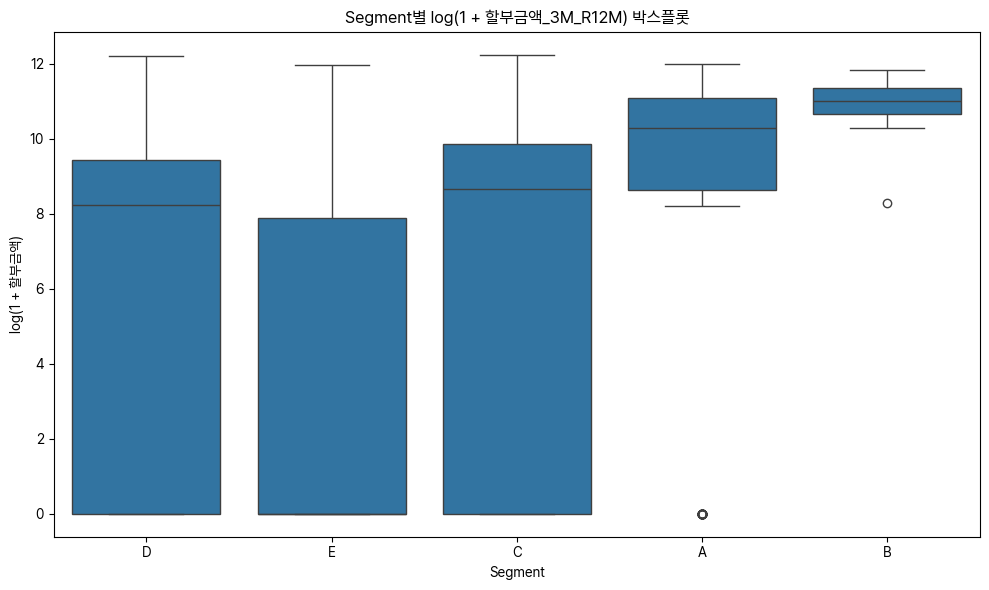

In [35]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 로그 변환된 컬럼 추가
installment_merged['log_할부금액_3M_R12M'] = np.log1p(installment_merged['할부금액_3M_R12M'])

# 박스플롯
plt.figure(figsize=(10, 6))
sns.boxplot(data=installment_merged, x='Segment', y='log_할부금액_3M_R12M')
plt.title("Segment별 log(1 + 할부금액_3M_R12M) 박스플롯")
plt.xlabel("Segment")
plt.ylabel("log(1 + 할부금액)")
plt.tight_layout()
plt.show()

In [37]:
from sklearn.feature_selection import f_classif
import pandas as pd

# 1. 수치형 컬럼만 필터
X = installment_merged.select_dtypes(include=['float64', 'int64']).copy()
X = X.drop(columns=['Segment'], errors='ignore')

# 2. 범주형 타겟
y = installment_merged['Segment']

# 3. f-score, p-value 계산
f_values, p_values = f_classif(X, y)

# 4. 결과 정리
anova_df = pd.DataFrame({'feature': X.columns, 'f_score': f_values, 'p_value': p_values})
anova_df = anova_df.sort_values(by='f_score', ascending=False)

# 상위 10개 변수 출력
anova_df.head(10)


c:\Users\somee\anaconda3\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [24 25 27 28] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
c:\Users\somee\anaconda3\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


,feature,f_score,p_value
4,할부금액_3M_R12M,1350305.43%,0.00%
20,할부금액_무이자_3M_R12M,1292141.54%,0.00%
5,할부금액_6M_R12M,1020505.52%,0.00%
0,할부건수_3M_R12M,923029.04%,0.00%
21,할부금액_무이자_6M_R12M,900682.35%,0.00%
16,할부건수_무이자_3M_R12M,895366.01%,0.00%
32,log_할부금액_3M_R12M,777662.19%,0.00%
1,할부건수_6M_R12M,676379.11%,0.00%
17,할부건수_무이자_6M_R12M,623984.22%,0.00%
12,할부금액_유이자_3M_R12M,462204.64%,0.00%


C:\Users\somee\AppData\Local\Temp\ipykernel_1344\420556256.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_features, x='f_score', y='feature', palette='Blues_d')


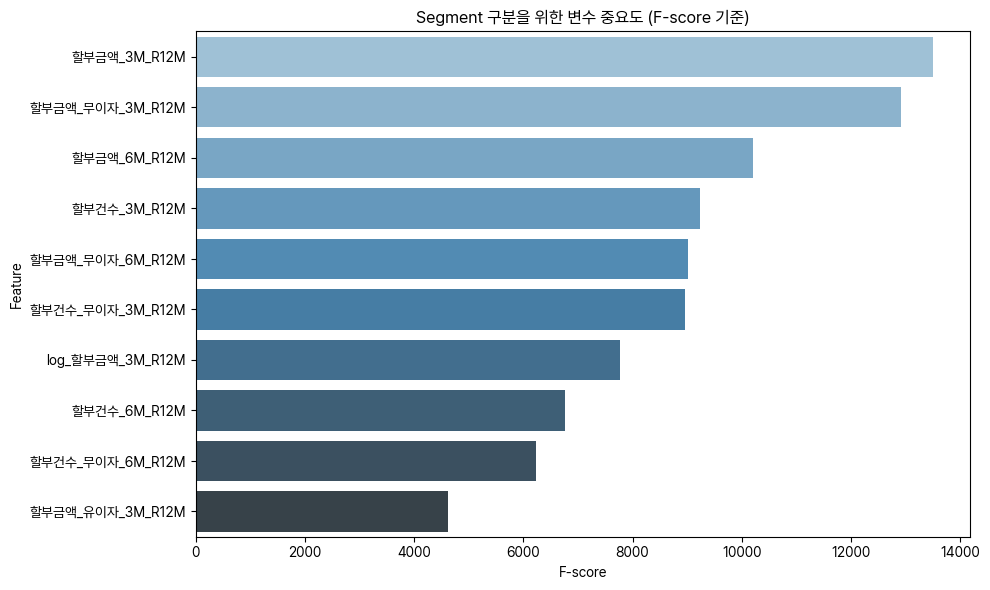

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

top_features = anova_df.head(10)

plt.figure(figsize=(10, 6))
sns.barplot(data=top_features, x='f_score', y='feature', palette='Blues_d')
plt.title("Segment 구분을 위한 변수 중요도 (F-score 기준)")
plt.xlabel("F-score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

In [39]:
# Segment 비율 확인
segment_counts = installment_merged['Segment'].value_counts(normalize=True)
print(segment_counts)

Segment
E   80.09%
D   14.55%
C    5.32%
A    0.04%
B    0.01%
Name: proportion, dtype: float64


In [42]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# 수치형 변수 추출 (Segment 제외)
X = installment_merged.select_dtypes(include=['float64', 'int64']).drop(columns=['Segment'], errors='ignore')

# 타겟: Segment → Label Encoding
le = LabelEncoder()
y = le.fit_transform(installment_merged['Segment'])  # A~E를 0~4로 인코딩

In [44]:
# 1. 사전 변수 선택 (상위 중요도 변수만)
X_small = X[anova_df.head(50)['feature']]  # f-score 기준 상위 50개 변수만 사용

# 2. 모델 구성 및 학습
from sklearn.ensemble import RandomForestClassifier
import time

start = time.time()

rf = RandomForestClassifier(n_estimators=50, random_state=42, class_weight='balanced', n_jobs=-1)
rf.fit(X_small, y)

end = time.time()
print(f"⏱ 학습 소요 시간: {end - start:.2f}초")

⏱ 학습 소요 시간: 5.68초


In [45]:
# 변수 중요도 추출
importances = rf.feature_importances_
feature_names = X.columns

# 정리
importance_df = pd.DataFrame({
    'feature': feature_names,
    'importance': importances
}).sort_values(by='importance', ascending=False)

# 상위 20개 출력
importance_df.head(20)

,feature,importance
1,할부건수_6M_R12M,15.09%
0,할부건수_3M_R12M,14.62%
6,할부금액_12M_R12M,11.91%
5,할부금액_6M_R12M,8.20%
3,할부건수_14M_R12M,8.04%
2,할부건수_12M_R12M,7.98%
4,할부금액_3M_R12M,7.81%
8,할부건수_유이자_3M_R12M,4.17%
9,할부건수_유이자_6M_R12M,3.75%
7,할부금액_14M_R12M,3.71%


C:\Users\somee\AppData\Local\Temp\ipykernel_1344\1275456113.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=importance_df.head(top_n), x='importance', y='feature', palette='Blues_d')


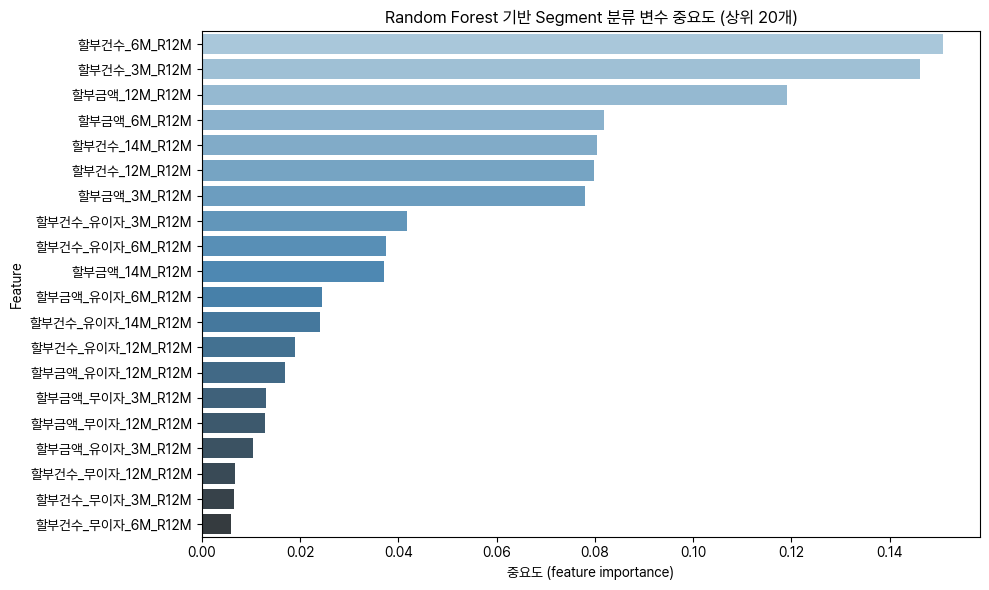

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt

top_n = 20
plt.figure(figsize=(10, 6))
sns.barplot(data=importance_df.head(top_n), x='importance', y='feature', palette='Blues_d')
plt.title("Random Forest 기반 Segment 분류 변수 중요도 (상위 20개)")
plt.xlabel("중요도 (feature importance)")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

In [47]:
from sklearn.preprocessing import OneHotEncoder
from scipy.stats import pointbiserialr
import pandas as pd

# 1. 수치형 변수 추출
X_numeric = installment_merged.select_dtypes(include=['float64', 'int64']).drop(columns=['Segment'], errors='ignore')

# 2. Segment를 One-hot 인코딩
segment_ohe = pd.get_dummies(installment_merged['Segment'], prefix='Segment')

# 3. 각 Segment와 수치형 변수 간 Point-Biserial 상관계수 계산
results = []

for seg_col in segment_ohe.columns:
    for var in X_numeric.columns:
        corr, p = pointbiserialr(segment_ohe[seg_col], X_numeric[var])
        results.append({
            'Segment': seg_col.replace("Segment_", ""),
            'Variable': var,
            'Correlation': corr,
            'p_value': p
        })

# 4. 결과 정리
corr_df = pd.DataFrame(results)

c:\Users\somee\anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:5535: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  rpb, prob = pearsonr(x, y)


In [48]:
corr_df

,Segment,Variable,Correlation,p_value
0,A,할부건수_3M_R12M,3.94%,0.00%
1,A,할부건수_6M_R12M,2.27%,0.00%
2,A,할부건수_12M_R12M,1.04%,0.00%
3,A,할부건수_14M_R12M,-0.02%,88.82%
4,A,할부금액_3M_R12M,7.77%,0.00%
...,...,...,...,...
160,E,할부금액_부분_3M_R12M,NaN,NaN
161,E,할부금액_부분_6M_R12M,-0.32%,4.49%
162,E,할부금액_부분_12M_R12M,-6.70%,0.00%
163,E,할부금액_부분_14M_R12M,0.00%,98.56%
